<a href="https://colab.research.google.com/github/mahsanazar/Computer-Vision_Object-Detection-/blob/main/object%20detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision torchaudio
!pip install opencv-python
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!pip install -r requirements.txt  # install dependencies



  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [1]:
import torch

# Load YOLOv5 model from Ultralytics
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x


/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-6-21 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 199MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
!pip install gdown



Downloading...
From: https://drive.google.com/uc?id=1kF2UkdyqhnRkNM9VCd7_3LJLAoxru9fY
To: /content/image.jpg
100%|██████████| 613k/613k [00:00<00:00, 8.60MB/s]

Image shape: (960, 1280, 3)
Image data type: uint8


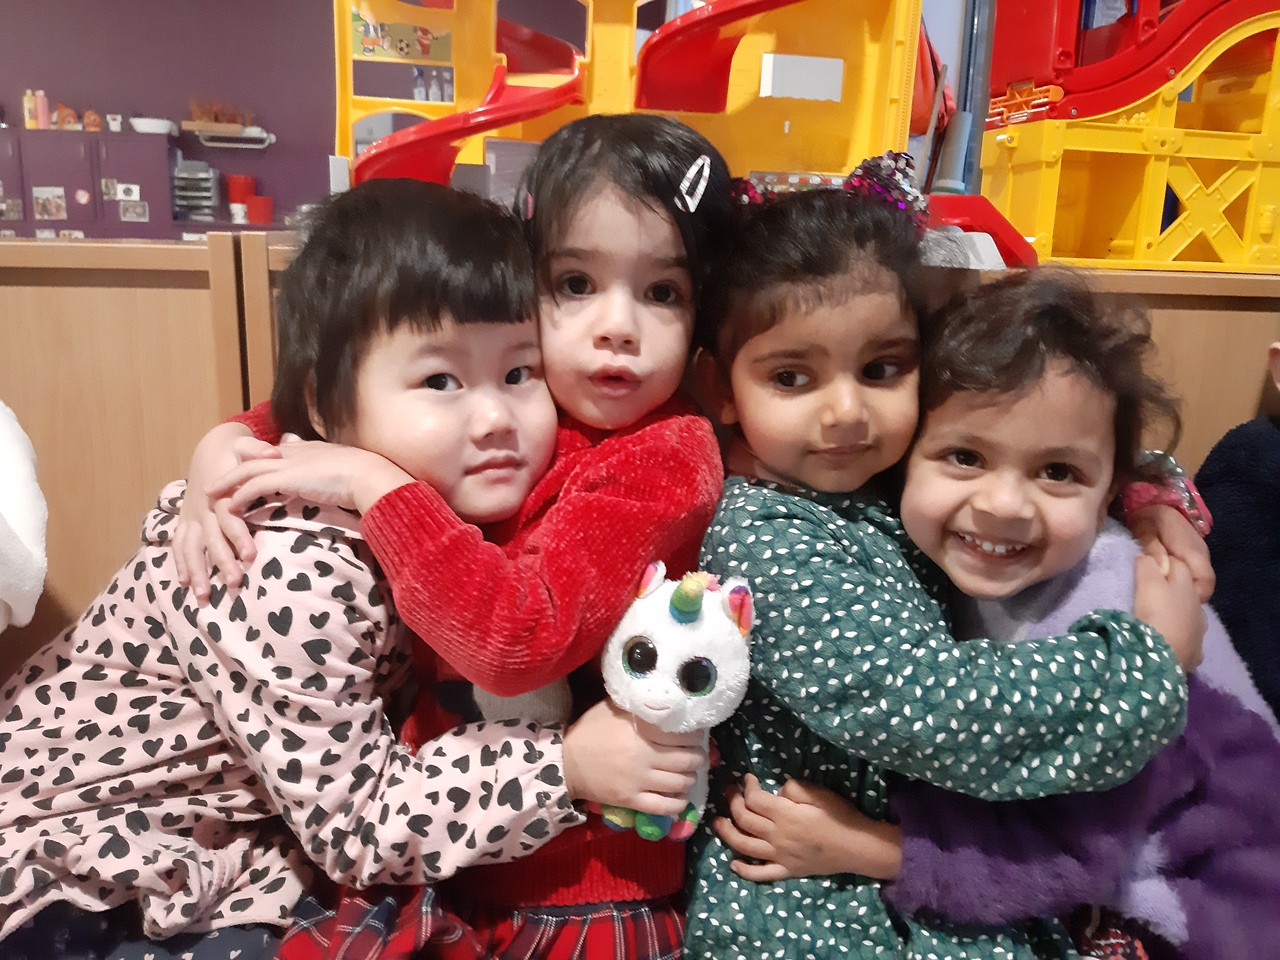

In [32]:
import gdown
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image  # Import Image class from IPython.display for alternative display method

# Replace 'YOUR_FILE_ID' with the actual file ID from the shared link
file_id = '1kF2UkdyqhnRkNM9VCd7_3LJLAoxru9fY'

# Construct the download URL
url = f'https://drive.google.com/uc?id={file_id}'

# Specify the output file name
output = 'image.jpg'

# Download the file from Google Drive using gdown
gdown.download(url, output, quiet=False)

# Read the downloaded image using OpenCV
image = cv2.imread(output)

# Check if the image was successfully loaded
if image is None:
    print(f"Failed to read image '{output}'")
else:
    # Print image shape and type for verification
    print(f"Image shape: {image.shape}")
    print(f"Image data type: {image.dtype}")

    # Convert from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.title('Displaying Image with Matplotlib')
    plt.show()

    # Alternative display method using IPython.display.Image
    display_image = Image(filename=output)
    display(display_image)


In [33]:
import torch

# Load YOLOv5 model from Ultralytics
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-21 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1: 960x1280 5 persons
Speed: 23.2ms pre-process, 80.7ms inference, 745.3ms NMS per image at shape (1, 3, 480, 640)


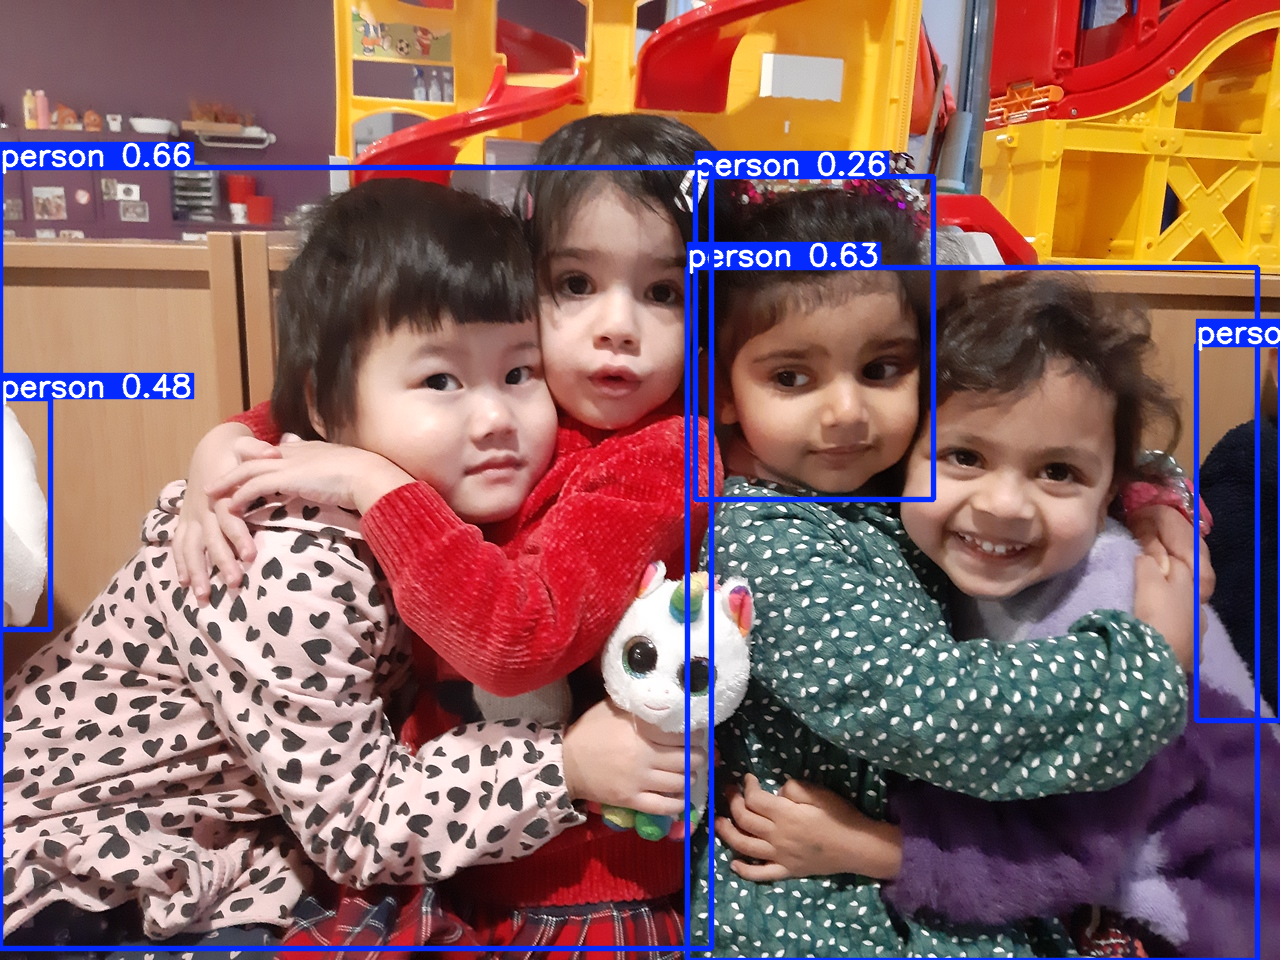

In [34]:
# Perform inference
results = model(image_rgb)

# Print results
results.print()

# Display results
results.show()  # or results.save() to save the image with detections


In [35]:
import numpy as np

# Extract bounding boxes, confidences, and class labels
detections = results.xyxy[0].cpu().numpy()

# Loop over detections and draw bounding boxes
for x1, y1, x2, y2, conf, cls in detections:
    label = f'{model.names[int(cls)]} {conf:.2f}'
    # Draw bounding box
    cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
    # Draw label
    cv2.putText(image_rgb, label, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
